<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [2]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [3]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


In [5]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


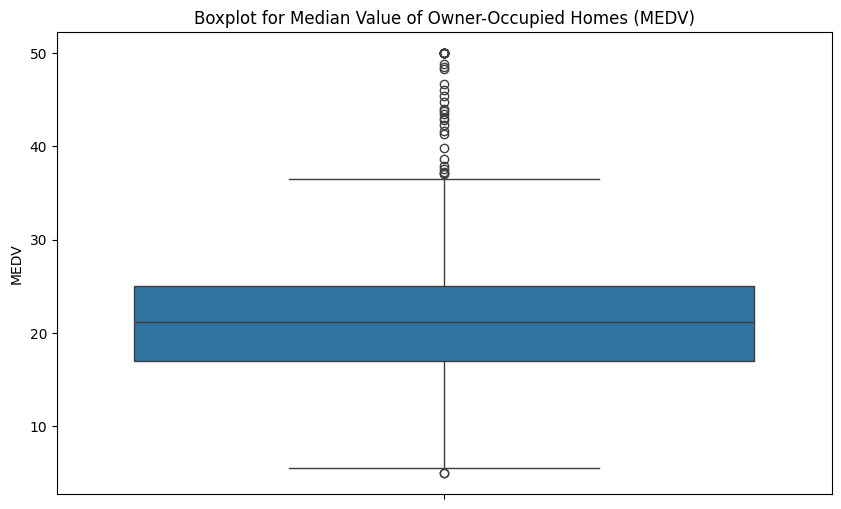

In [8]:
# Boxplot for "Median value of owner-occupied homes" (MEDV)
plt.figure(figsize=(10, 6))
sns.boxplot(y='MEDV', data=boston_df)
plt.title('Boxplot for Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('MEDV')
plt.show()

## This boxplot displays the distribution of the median values of owner-occupied homes. We can observe the central tendency, spread, and potential outliers in the data.


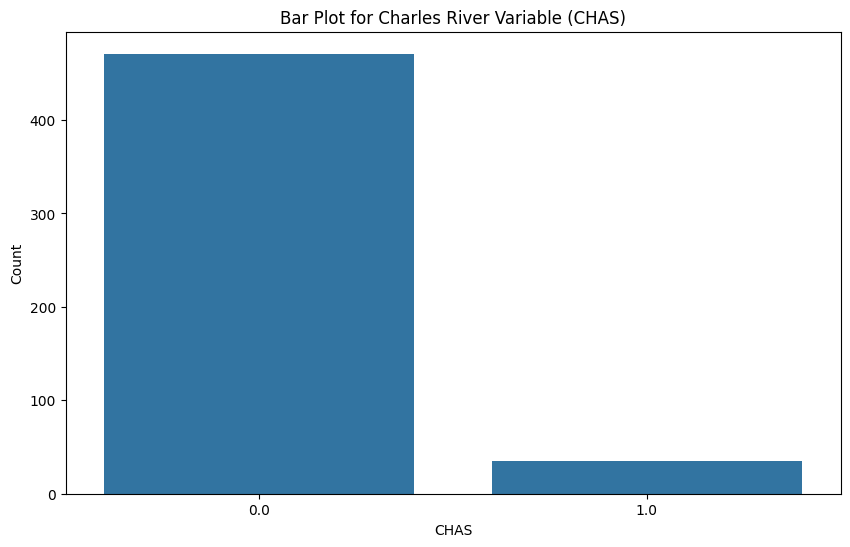

In [12]:
# Bar plot for the Charles river variable (CHAS)
plt.figure(figsize=(10, 6))
sns.countplot(x='CHAS', data=boston_df)
plt.title('Bar Plot for Charles River Variable (CHAS)')
plt.xlabel('CHAS')
plt.ylabel('Count')
plt.show()

## The bar plot shows the count of homes located near the Charles River (CHAS variable). It indicates how many homes are located near the river (1) versus not near the river (0).




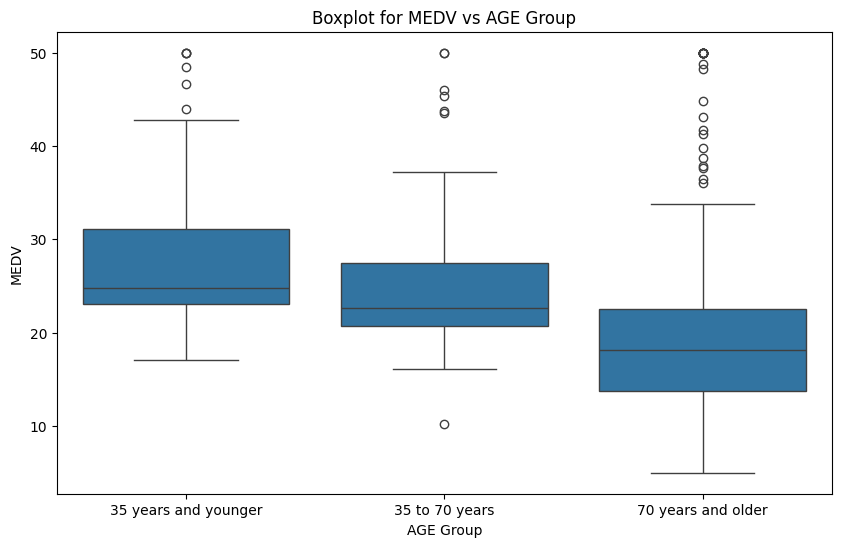

In [15]:
# Boxplot for MEDV vs AGE (discretized)
bins = [0, 35, 70, 100]
labels = ['35 years and younger', '35 to 70 years', '70 years and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels)

plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
plt.title('Boxplot for MEDV vs AGE Group')
plt.xlabel('AGE Group')
plt.ylabel('MEDV')
plt.show()

## This boxplot compares the median value of homes (MEDV) across different age groups of homes. By discretizing AGE into three groups, we can see if there are significant differences in home values based on the age of the homes.

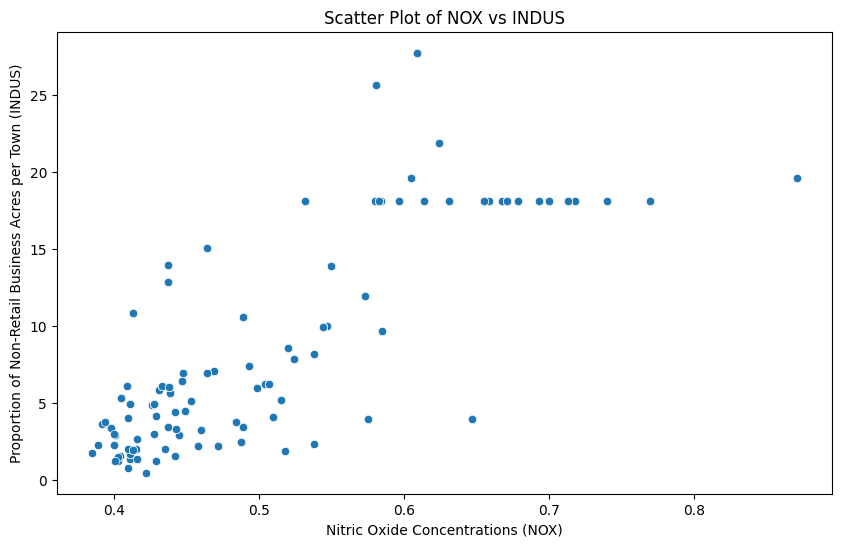

In [18]:
# Scatter plot for NOX vs INDUS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Nitric Oxide Concentrations (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.show()

## This scatter plot visualizes the relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS). A pattern or trend in this plot can indicate a relationship between industrial activity and pollution levels.

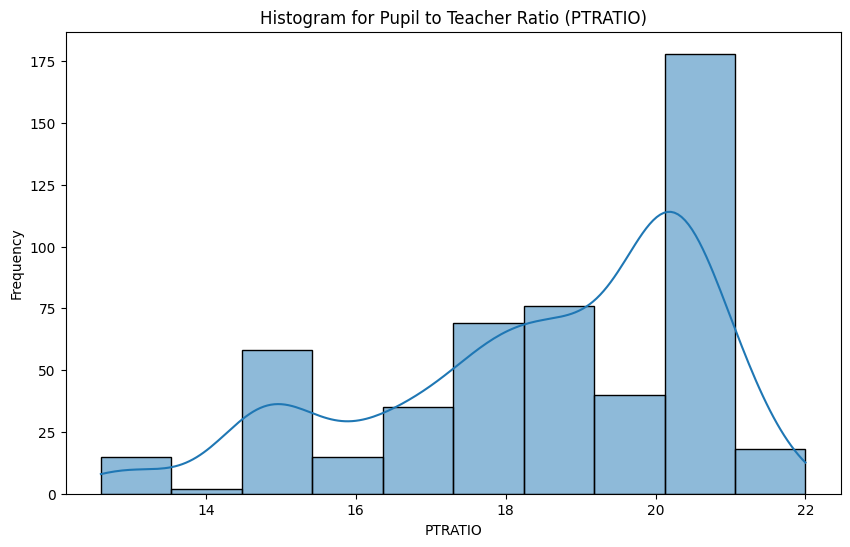

In [20]:
# Histogram for PTRATIO
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=10, kde=True)
plt.title('Histogram for Pupil to Teacher Ratio (PTRATIO)')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.show()

## The histogram shows the distribution of the pupil-to-teacher ratio (PTRATIO). This helps in understanding the central tendency and spread of this ratio across different towns.


In [26]:
#T-test for Independent Samples: Significant Difference in MEDV Based on Charles River Bound
#Hypothesis: Null Hypothesis (H0): There is no significant difference in the median value of houses (MEDV) based on whether they are bounded by the Charles River or not.
#Alternative Hypothesis (H1): There is a significant difference in the median value of houses (MEDV) based on whether they are bounded by the Charles River or not.

from scipy.stats import ttest_ind

# Perform T-test
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

t_stat, p_value = ttest_ind(chas_0, chas_1, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in MEDV based on Charles River boundary.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in MEDV based on Charles River boundary.")


T-statistic: -3.113291312794837, P-value: 0.003567170098137517
Reject the null hypothesis: There is a significant difference in MEDV based on Charles River boundary.


In [28]:
#ANOVA: Difference in MEDV for Different AGE Groups
#Hypothesis: Null Hypothesis (H0): There is no difference in the median values of houses (MEDV) across different age groups.
#Alternative Hypothesis (H1): There is a difference in the median values of houses (MEDV) across different age groups.
from scipy.stats import f_oneway

# Discretize AGE
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '35-70', '>70'])

# Perform ANOVA
age_groups = boston_df['AGE_group'].unique()
medv_values = [boston_df[boston_df['AGE_group'] == group]['MEDV'] for group in age_groups]

f_stat, p_value = f_oneway(*medv_values)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in MEDV across different age groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in MEDV across different age groups.")

F-statistic: 36.40764999196599, P-value: 1.7105011022702984e-15
Reject the null hypothesis: There is a significant difference in MEDV across different age groups.


In [30]:
#Pearson Correlation: Relationship Between NOX and INDUS
#Hypothesis: Null Hypothesis (H0): There is no relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).
#Alternative Hypothesis (H1): There is a relationship between nitric oxide concentrations (NOX) and the proportion of non-retail business acres per town (INDUS).

from scipy.stats import pearsonr

# Perform Pearson correlation
correlation, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Correlation coefficient: {correlation}, P-value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant relationship between NOX and INDUS.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between NOX and INDUS.")


Correlation coefficient: 0.7636514469209151, P-value: 7.913361061239527e-98
Reject the null hypothesis: There is a significant relationship between NOX and INDUS.


In [31]:
#Regression Analysis: Impact of DIS on MEDV
#Hypothesis: Null Hypothesis (H0): The weighted distance to the five Boston employment centres (DIS) has no impact on the median value of owner-occupied homes (MEDV).
#Alternative Hypothesis (H1): The weighted distance to the five Boston employment centres (DIS) has an impact on the median value of owner-occupied homes (MEDV).

import statsmodels.api as sm

# Perform regression analysis
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)  # Add a constant term for the intercept

model = sm.OLS(y, X).fit()
print(model.summary())

p_value = model.pvalues[1]

if p_value < 0.05:
    print("Reject the null hypothesis: DIS has a significant impact on MEDV.")
else:
    print("Fail to reject the null hypothesis: DIS does not have a significant impact on MEDV.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 13 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        10:16:51   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0